### SIR Model of the Epidemic
S: susceptible individuals

I: infected individuals

R: recovered/removed individuals

$\frac{\mathrm{d}S}{\mathrm{d}t} = -\beta SI$

$\frac{\mathrm{d}I}{\mathrm{d}t} = \beta SI - \gamma I$

$\frac{\mathrm{d}R}{\mathrm{d}t} = \gamma I$

$\beta = 0.001, \gamma = 0.009$

$S(0) = 100, I(0) = 1, R(0) = 0, t \in [0, 100]$

In [1]:
from typing import List, Callable, Tuple
import autograd.numpy as np

from core.neural_network import init_weights, forward
from core.optimizers import gradient_descent, adam
from core.activation_functions import elu, sigmoid, tanh, arctan
from core.plotting_tools import plot_ode, plot_system_ode
from core.loss_function import trial_grad

In [2]:
SIR_0 = np.array([100, 1, 0])
BG = np.array([0.001, 0.009])


def derivative(t, sir) -> np.ndarray:
    """The Lorenz derivatives.

    Args:
        t: input vector
        sir: The function vector

    Returns:
        Value of sir's partial derivatives at t.
    """
    b, g = BG
    s, i, r = sir
    s_dot = -b * s * i
    i_dot = b * s * i - g * i
    r_dot = g * i
    return np.array([s_dot, i_dot, r_dot])


def trial_solution(
    t: np.array, weights_list: List[List[np.array]], activation_fns: List[Callable]
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights_list: A list of weights and biases for each neural networks

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(weights_list), len(t))
    """
    f = [
        forward(t, weights_list[i], activation_fns).reshape(t.size)
        for i in range(len(weights_list))
    ]
    return np.array([SIR_0[i] + t * f[i] for i in range(len(weights_list))])

### Training

Iteration:  0
 31.69122940402189
Iteration:  1
 30.887041801287367
Iteration:  2
 30.094126440238522
Iteration:  3
 29.312692993644717
Iteration:  4
 28.54294155535062
Iteration:  5
 27.78506341796082
Iteration:  6
 27.039242056488618
Iteration:  7
 26.305654193131943
Iteration:  8
 25.584470889135986
Iteration:  9
 24.87585862941017
Iteration:  10
 24.179980366442777
Iteration:  11
 23.496996490336315
Iteration:  12
 22.827065692678108
Iteration:  13
 22.17034569429046
Iteration:  14
 21.52699381164444
Iteration:  15
 20.897167343628563
Iteration:  16
 20.281023765943864
Iteration:  17
 19.678720717860337
Iteration:  18
 19.090415751999963
Iteration:  19
 18.516265802117537
Iteration:  20
 17.956426324248735
Iteration:  21
 17.411050085870883
Iteration:  22
 16.880285599271673
Iteration:  23
 16.364275205940338
Iteration:  24
 15.863152821245187
Iteration:  25
 15.377041351948785
Iteration:  26
 14.906049807718306
Iteration:  27
 14.450270140656473
Iteration:  28
 14.009773861508808
I

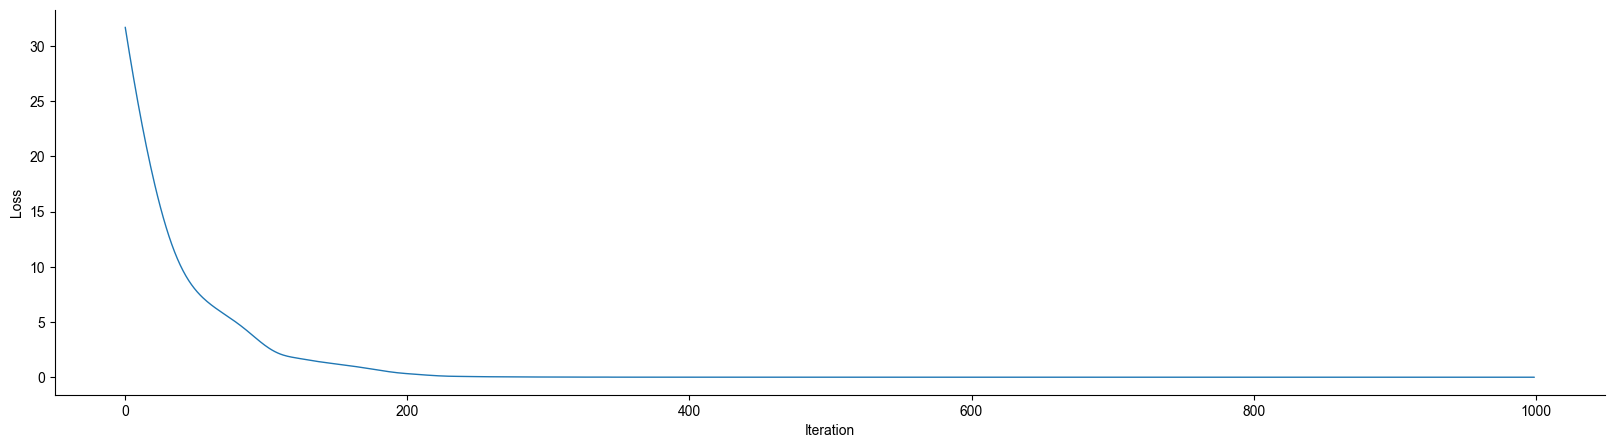

In [3]:
def train():
    t = np.arange(0, 50, 0.1)
    hidden_sizes = np.array([100])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn_weights_1 = init_weights(1, hidden_sizes, 1)
    nn_weights_2 = init_weights(1, hidden_sizes, 1)
    nn_weights_3 = init_weights(1, hidden_sizes, 1)
    adam(
        t,
        [nn_weights_1, nn_weights_2, nn_weights_3],
        activation_fns,
        trial_solution,
        derivative,
        num_iters=1000,
        step_size=0.001,
        threshold=0.0032,
    )

    return [nn_weights_1, nn_weights_2, nn_weights_3], activation_fns


weights_list, activation_fns = train()

In [ ]:
def continue_train(weights_list, activation_fns):
    t = np.arange(0, 50, 0.1)
    adam(
        t,
        weights_list,
        activation_fns,
        trial_solution,
        derivative,
        num_iters=1000,
        step_size=0.0001,
        threshold=0.0032,
    )

    return weights_list, activation_fns


weights_list, activation_fns = continue_train(weights_list, activation_fns)

### Evaluating Results

In [4]:
from scipy.integrate import odeint
from matplotlib import pyplot as plt


t = np.arange(0, 50, 0.01)


sol = np.array(odeint(derivative, SIR_0, t, tfirst=True))
sol = sol.T

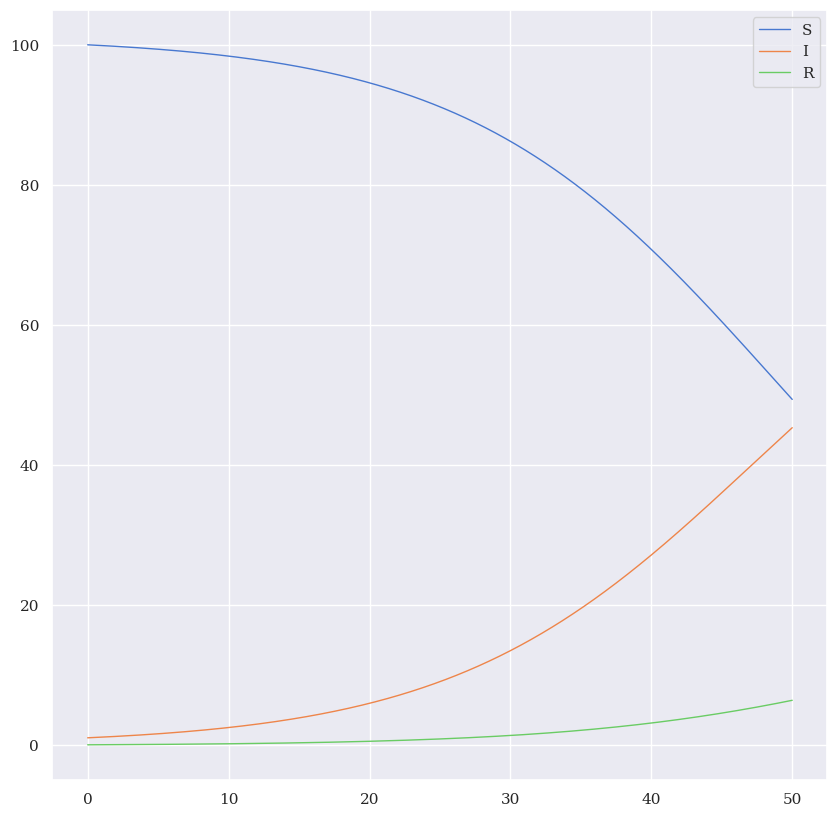

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.plot(t, sol[0], lw=1)
ax.plot(t, sol[1], lw=1)
ax.plot(t, sol[2], lw=1)
ax.legend(["S", "I", "R"])

In [8]:
t = np.arange(0, 50, 0.5)
res = trial_solution(t, weights_list, activation_fns)

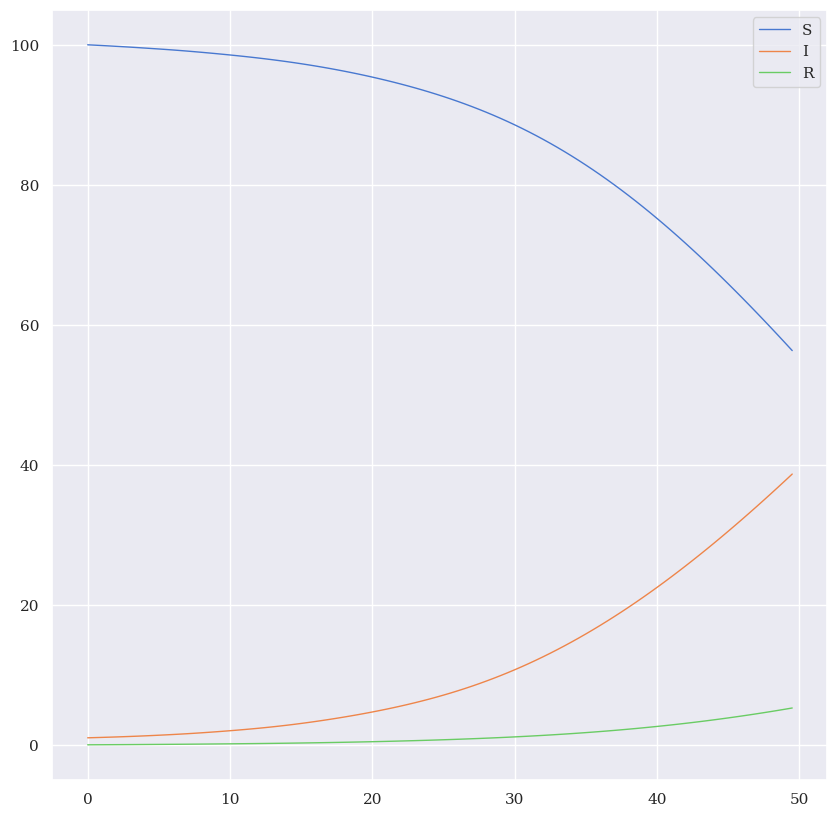

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.plot(t, res[0], lw=1)
ax.plot(t, res[1], lw=1)
ax.plot(t, res[2], lw=1)
ax.legend(["S", "I", "R"])

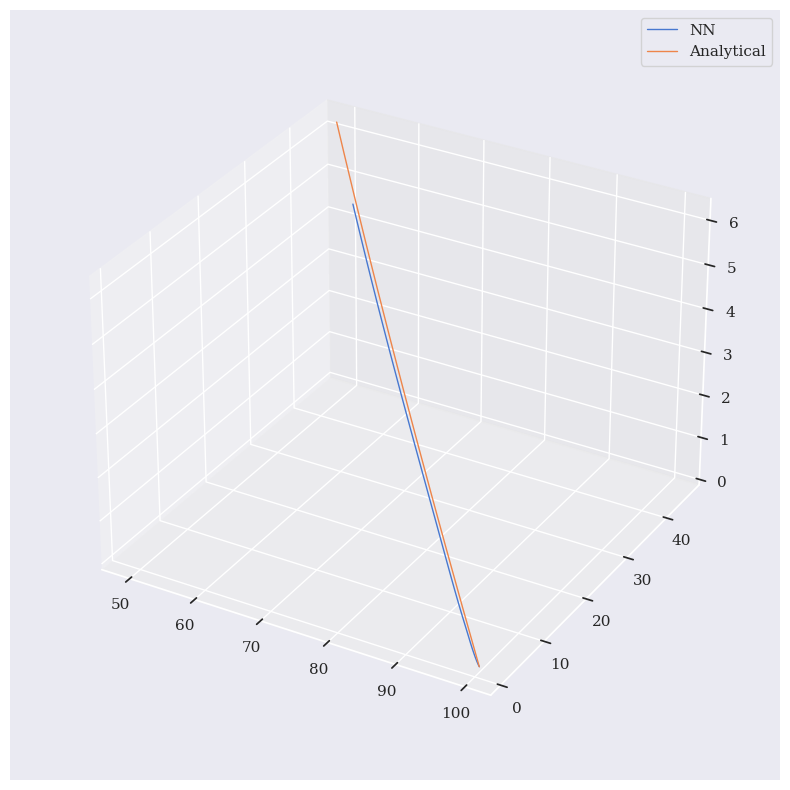

In [10]:
plot_system_ode(res, sol)